In [1]:
import sys
!{sys.executable} -m pip install -U imbalanced-learn

In [21]:

import os
import numpy as np
from numpy import argmax
import pandas as pd
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# Statistics, EDA, metrics libraries
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.utils import class_weight
from collections import Counter

# Modeling libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_predict,KFold, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.metrics import SCORERS
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

import pickle

In [22]:
%cd /mnt/home/d.alvarez/Documents/Internship/

print("File location using os.getcwd():", os.getcwd())

/mnt/home/d.alvarez/Documents/Internship
File location using os.getcwd(): /mnt/home/d.alvarez/Documents/Internship


In [23]:
data = pd.read_csv("data/training_data/final_training_set.csv")

#classes = ['n_flip', 'random']
#data = data[data.conformation_type.isin(classes)]

data.reset_index(drop=True, inplace=True)

residue_info = data[['pdb_id','asymID','compID', 'insCode', 'seqNum', 'seqID_besttls']]
conformation_type = data['conformation_type']
#df = data.drop(["conformation_type",'asymID','compID', 'insCode', 'seqNum', 'seqID_besttls','index'], axis=1)
df = data.loc[:, 'cn_m1':'dssp_p2T']
#df = df.iloc[:, 0:80]

RANDOM_STATE = 42


/tmp/ipykernel_1201317/2131167629.py:1: DtypeWarning: Columns (150) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/training_data/final_training_set.csv")


In [24]:
labelencoder = LabelEncoder()

conformation_type_encoded = pd.Series(labelencoder.fit_transform(conformation_type), name = "encoded_label")

label_conformation = pd.concat([conformation_type, conformation_type_encoded], axis=1)

label = pd.concat([label_conformation,residue_info], axis=1)

unique_label = label_conformation.drop_duplicates(ignore_index=True)


unique_label




,conformation_type,encoded_label
0,random,3
1,pep_flip,2
2,o_flip,1
3,n_flip,0


In [25]:
X = df
X_train, X_test, y_train_info, y_test_info = train_test_split(X, label, test_size=0.4, random_state = RANDOM_STATE, stratify=label["encoded_label"])


y_train_info['encoded_label_binary'] = y_train_info["encoded_label"].apply(lambda x: 0 if x < 3 else 1)
y_test_info['encoded_label_binary'] = y_test_info["encoded_label"].apply(lambda x: 0 if x < 3 else 1)

y_train = y_train_info["encoded_label"].array
y_test = y_test_info["encoded_label"].array

y_test



<PandasArray>
[2, 2, 3, 3, 3, 2, 2, 2, 3, 3,
 ...
 3, 3, 3, 2, 2, 3, 2, 3, 2, 3]
Length: 99684, dtype: int64

In [26]:
def split_data(label):

    RANDOM_STATE = 42
    classes = [label, 'random']
    
    data = pd.read_csv("data/training_data/final_training_set.csv")
    data = data[data.conformation_type.isin(classes)]


    data.reset_index(drop=False, inplace=True)

    residue_info = data[['asymID','compID', 'insCode', 'seqNum', 'seqID_besttls','index']]
    conformation_type = data["conformation_type"]
    #df = data.drop(["conformation_type",'asymID','compID', 'insCode', 'seqNum', 'seqID_besttls','index'], axis=1)
    #df = data.loc[:, 'cn_m1':'dcaca']
    df = data.loc[:, 'cn_m1':'dssp_p2T']
    labelencoder = LabelEncoder()

    conformation_type_encoded = pd.Series(labelencoder.fit_transform(conformation_type), name = "encoded_label")
    
    label = pd.concat([conformation_type, conformation_type_encoded], axis=1)

    X = df
    y = label["encoded_label"].array

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = RANDOM_STATE  , stratify=y)


    return X_train, X_test, y_train, y_test

In [27]:
X_train_n_flip, X_test_n_flip, y_train_n_flip, y_test_n_flip = split_data("n_flip")
X_train_o_flip, X_test_o_flip, y_train_o_flip, y_test_o_flip = split_data("o_flip")
X_train_pep_flip, X_test_pep_flip, y_train_pep_flip, y_test_pep_flip = split_data("pep_flip")

/tmp/ipykernel_1201317/1935497695.py:6: DtypeWarning: Columns (150) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/training_data/final_training_set.csv")
/tmp/ipykernel_1201317/1935497695.py:6: DtypeWarning: Columns (150) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/training_data/final_training_set.csv")
/tmp/ipykernel_1201317/1935497695.py:6: DtypeWarning: Columns (150) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/training_data/final_training_set.csv")


In [28]:
clf_n_flip =pickle.load(open('provisional_n_flip.pkl', 'rb'))
clf_o_flip =pickle.load(open('provisional_o_flip.pkl', 'rb'))
clf_pep_flip =pickle.load(open('provisional_pep_flip.pkl', 'rb'))

In [29]:
clf_n_flip =pickle.load(open('provisional_n_flip.pkl', 'rb'))
clf_o_flip =pickle.load(open('provisional_o_flip.pkl', 'rb'))
clf_pep_flip =pickle.load(open('provisional_pep_flip.pkl', 'rb'))

y_pred_n_flip = clf_n_flip.predict(X_test_n_flip)
y_pred_o_flip = clf_o_flip.predict(X_test_o_flip)
y_pred_pep_flip = clf_pep_flip.predict(X_test_pep_flip)



In [30]:
X_test_all = [X_test_n_flip,X_test_o_flip,X_test_pep_flip]
y_test_all = [y_test_n_flip,y_test_o_flip,y_test_pep_flip]
y_pred_all = [y_pred_n_flip,y_pred_o_flip,y_pred_pep_flip]
#recall_score, precision_score, roc_auc_score, f1_score
balanced_accuracy_all = [balanced_accuracy_score(y_test, y_pred) for y_test, y_pred in zip(y_test_all,y_pred_all)]

models_list = ["n-flip","o-flip","pep-flip"]
recall_all = [recall_score(y_test, y_pred,average= "macro") for y_test, y_pred in zip(y_test_all,y_pred_all)]
precision_all = [precision_score(y_test, y_pred, average= "macro") for y_test, y_pred in zip(y_test_all,y_pred_all)]
f1_score_all = [f1_score(y_test, y_pred,average= "macro") for y_test, y_pred in zip(y_test_all,y_pred_all)]
roc_auc_all = [roc_auc_score(y_test, y_pred) for y_test, y_pred in zip(y_test_all,y_pred_all)]

scores_df = pd.DataFrame(list(zip(models_list,balanced_accuracy_all, recall_all,precision_all,f1_score_all,roc_auc_all)),
               columns =['models', 'balanced_accuracy', 'recall', 'precision' ,'f1_score','roc_auc' ])
scores_df


,models,balanced_accuracy,recall,precision,f1_score,roc_auc
0,n-flip,0.817284,0.817284,0.557342,0.589837,0.817284
1,o-flip,0.899966,0.899966,0.575571,0.614473,0.899966
2,pep-flip,0.895306,0.895306,0.895279,0.895247,0.895306


In [31]:
def get_roc_curve(clf, X_test, y_test):
    
    yhat = clf.predict_proba(X_test)
    yhat = yhat[:, 1]
    # calculate pr-curve
    fpr, tpr, thresholds = roc_curve(y_test, yhat)
    
    return fpr, tpr, thresholds

In [32]:
fpr_n_flip, tpr_n_flip, thresholds_n_flip = get_roc_curve(clf_n_flip, X_test_n_flip ,y_test_n_flip)
fpr_o_flip, tpr_o_flip, thresholds_o_flip = get_roc_curve(clf_o_flip, X_test_o_flip,y_test_o_flip)
fpr_pep_flip, tpr_pep_flip, thresholds_pep_flip = get_roc_curve(clf_pep_flip, X_test_pep_flip,y_test_pep_flip)

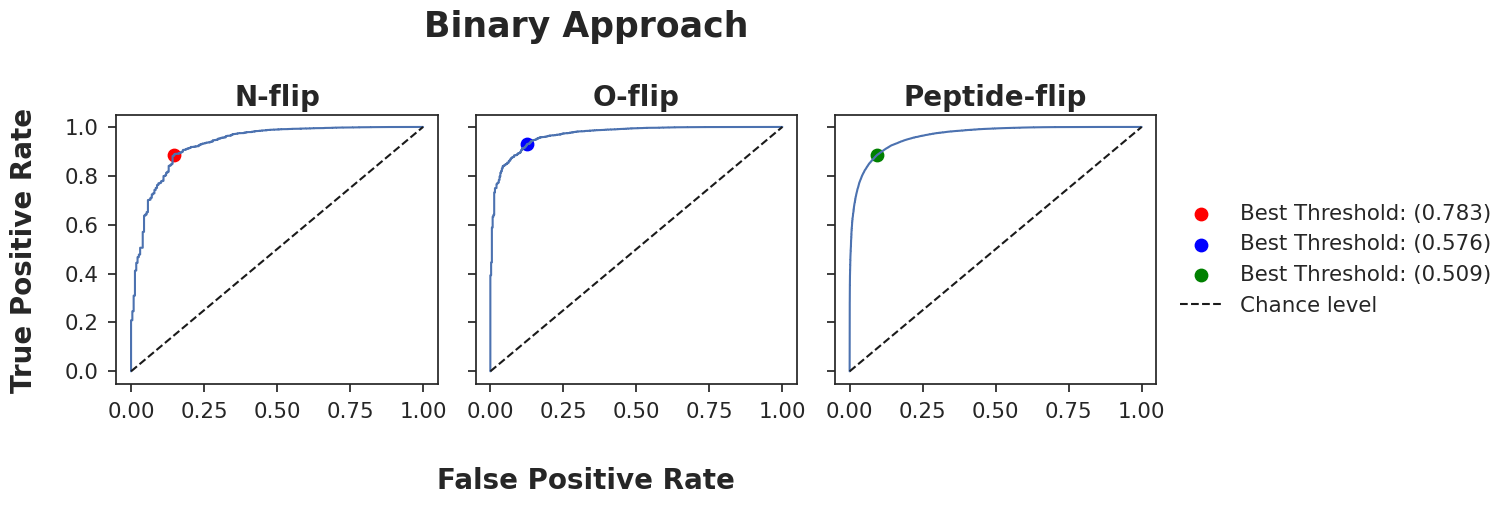

In [57]:
sns.set_theme(style="whitegrid",font_scale = 1.4)
sns.set_style("white")
sns.set_style("ticks")

X_test_all = [X_test_n_flip,X_test_o_flip,X_test_pep_flip]
fpr_all = [fpr_n_flip,fpr_o_flip,fpr_pep_flip]
tpr_all = [tpr_n_flip,tpr_o_flip,tpr_pep_flip]
thresholds_all = [thresholds_n_flip,thresholds_o_flip,thresholds_pep_flip]

gmeans_all = [np.sqrt(tpr * (1-fpr)) for fpr,tpr in zip(fpr_all,tpr_all)]
ix_all = [argmax(gmeans) for gmeans in gmeans_all]
x = np.linspace(0, 1, 1000)

fig, ax= plt.subplots(1, 3, sharex=True, sharey=True,figsize=(12, 5))


ax[0].plot(fpr_all[0], tpr_all[0])
ax[0].plot(x, x,'--k');
ax[0].scatter(fpr_all[0][ix_all[0]], tpr_all[0][ix_all[0]], marker='o', color='red',s = 80 ,label='Best Threshold: (%.3f)' %(thresholds_all[0][ix_all[0]]))
ax[0].set_title('N-flip',fontdict=dict(weight='bold'),fontsize = 20)

ax[1].plot(fpr_all[1], tpr_all[1])
ax[1].plot(x, x,'--k');
ax[1].scatter(fpr_all[1][ix_all[1]], tpr_all[1][ix_all[1]], marker='o', color='blue',s = 80, label='Best Threshold: (%.3f)' %(thresholds_all[1][ix_all[1]]))
ax[1].set_title('O-flip',fontdict=dict(weight='bold'),fontsize = 20)

ax[2].plot(fpr_all[2], tpr_all[2])
ax[2].scatter(fpr_all[2][ix_all[2]], tpr_all[2][ix_all[2]], marker='o', color='green',s = 80,label='Best Threshold: (%.3f)' %(thresholds_all[2][ix_all[2]]))
ax[2].set_title('Peptide-flip',fontdict=dict(weight='bold'),fontsize = 20)
ax[2].plot(x, x,'--k',label='Chance level');



fig.legend(bbox_to_anchor=(1.27, 0.33),loc='lower right')
fig.suptitle(f'Binary Approach',fontweight='bold',fontsize = 25)
fig.supxlabel('False Positive Rate',fontsize = 20,fontweight='bold')
fig.supylabel('True Positive Rate',fontsize = 20,fontweight='bold')

plt.tight_layout()

plt.show()


In [48]:
clf = pickle.load(open('provisional_n_flip.pkl', 'rb'))
y_pred = clf.predict(X_test)



Best Threshold=0.776778, G-mean=0.899


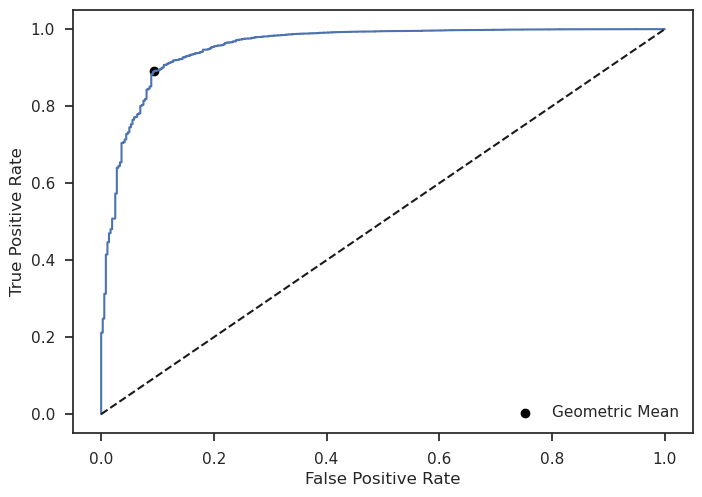

In [49]:
#y_pred = (clf.predict_proba(X_test)[:, 1] > 0.80).astype('float')


yhat = clf.predict_proba(X_test)
yhat = yhat[:, 1]
# calculate pr-curve
fpr, tpr, thresholds = roc_curve(y_test, yhat)

x = np.linspace(0, 1, 1000)

gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest f score
ix = argmax(gmeans)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

plt.plot(fpr, tpr)
plt.plot(x, x,'--k');
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Geometric Mean')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Features selected:  ['cn_m1' 'cn_p1' 'nca_m1' 'nca_p2' 'cac_m1' 'cac_r0' 'caca_m1' 'caca_p1'
 'cbcb_m1' 'cbcb_r0' 'cbcb_p1' 'ncac_m1' 'ncac_r0' 'ncac_p1' 'caco_r0'
 'ocn_m1' 'cacn_r0' 'cacn_p1' 'cacn_p2' 'cnca_m1' 'cnca_r0' 'cnca_p1'
 'cnca_p2' 'ncacb_m1' 'ncacb_r0' 'ncacb_p1' 'ccacb_r0' 'ccacb_p1' 'phi_m1'
 'phi_r0' 'phi_p1' 'psi_m1' 'psi_r0' 'psi_p1' 'omega_r0' 'occac_m1'
 'occac_r0' 'coco_m1' 'coco_r0' 'imp_r0' 'bn_m1' 'bn_r0' 'bn_p1' 'bn_p2'
 'bca_m1' 'bca_r0' 'bca_p1' 'bca_p2' 'bc_m1' 'bc_r0' 'bc_p1' 'bc_p2'
 'bo_m1' 'bo_r0' 'bo_p1' 'bo_p2' 'donor_1' 'acceptor_1' 'zram_m1'
 'zram_r0' 'zram_p1' 'zram_p2' 'dbond' 'dangle' 'dphi' 'dssp_m1'
 'dssp_m1E' 'dssp_m1H' 'dssp_m1loop' 'dssp_m1S' 'dssp_m1T' 'dssp_r0E'
 'dssp_r0T' 'dssp_p1E' 'dssp_p1H' 'dssp_p1loop' 'dssp_p1T' 'dssp_p2'
 'dssp_p2loop' 'dssp_p2T']

 The best parameters across ALL searched params:
 {'um__sampling_strategy': 0.5, 'om__sampling_strategy': 0.1, 'kbest__k': 80, 'classifier__subsample': 0.8, 'classifier__scale_pos_wei

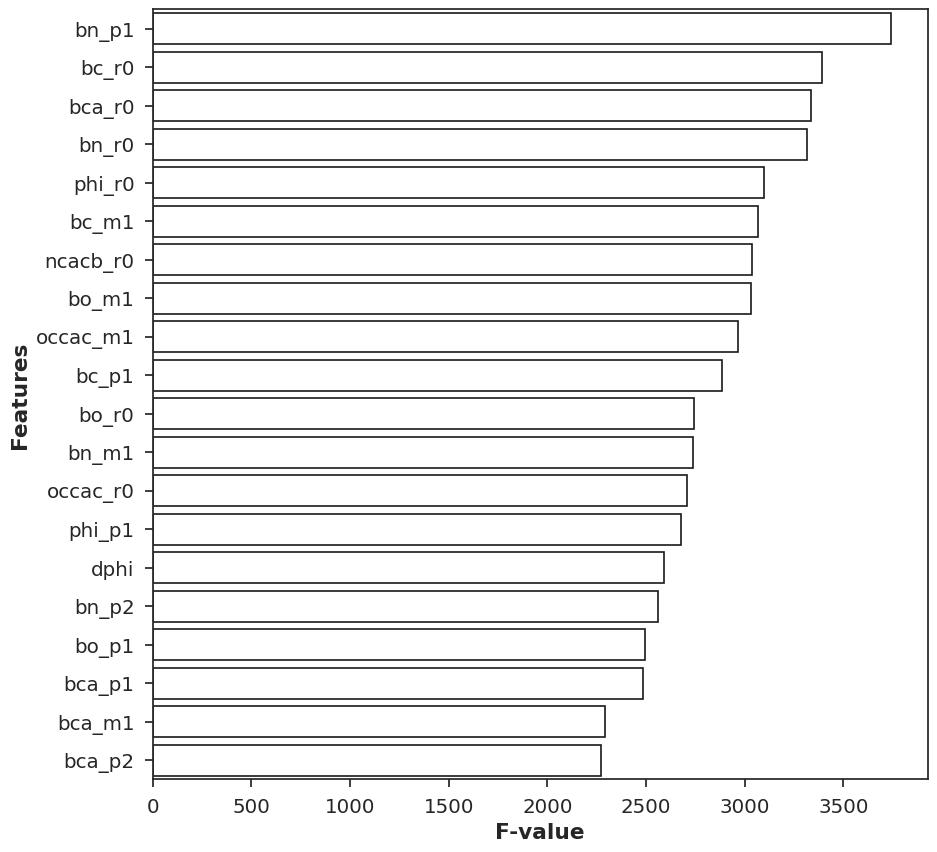

In [19]:
sns.set_theme(style="whitegrid",font_scale = 1.3)
sns.set_style("white")
sns.set_style("ticks")

clf = clf_n_flip
fs = clf.best_estimator_.named_steps['kbest']

features = np.array(X_train.columns)
selected_features = features[fs.get_support()]

print("Features selected: ", selected_features)
print("\n The best parameters across ALL searched params:\n", clf.best_params_)

scores = fs.scores_


features = list(map(str, features))

feature_importance = pd.DataFrame(list(zip(features, scores)), columns =['features', 'scores']).sort_values('scores', ascending=False).head(20)


fig = plt.figure(figsize= (10,10))
ax = sns.barplot(data=feature_importance, x="scores", y="features", capsize = 0.1, alpha = 1,
    linewidth=1.2, edgecolor=".1",color='white')

plt.xlabel("F-value",fontweight='bold')
plt.ylabel("Features",fontweight='bold')

plt.show()


In [37]:
feature_importance = pd.DataFrame(list(zip(features, scores)),
               columns =['features', 'scores'])

feature_importance.sort_values('scores', ascending=False).head(20)

,features,scores
82,bn_p1,3739.443169
89,bc_r0,3389.798595
85,bca_r0,3335.633791
81,bn_r0,3313.673396
57,phi_r0,3098.280318
88,bc_m1,3069.518330
49,ncacb_r0,3037.508612
92,bo_m1,3029.528365
68,occac_m1,2964.625881
90,bc_p1,2884.266513


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.78      0.23       360
           1       1.00      0.96      0.98     49825

    accuracy                           0.96     50185
   macro avg       0.57      0.87      0.61     50185
weighted avg       0.99      0.96      0.98     50185



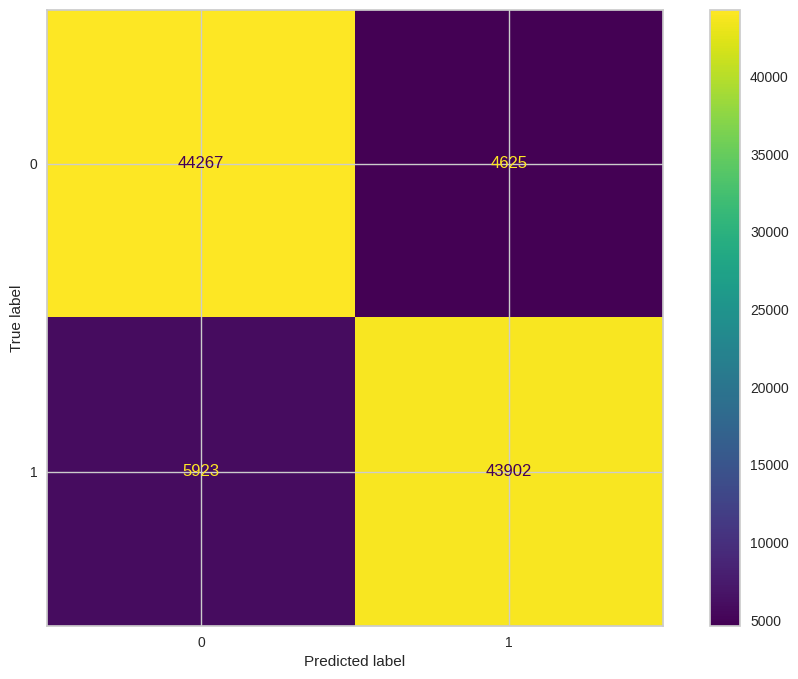

In [18]:
y_pred = (clf.predict_proba(X_test)[:, 1] > thresholds[ix]).astype('float')
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmp.plot(ax=ax)

plt.show();


In [13]:
confusion_matrix(y_test, y_pred)

array([[27545,  3012],
       [ 3451, 27690]])

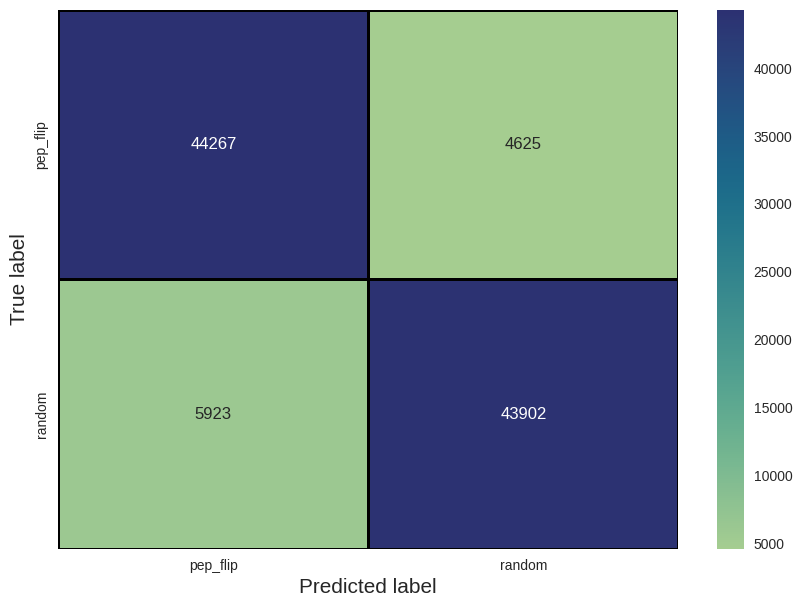

In [19]:
classes = unique_label.sort_values(by=['encoded_label'])['conformation_type']


df_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns= classes, index=classes)

plt.figure(figsize = (10,7))
ax = sns.heatmap(df_matrix, fmt='.6g' ,annot=True ,cmap='crest', linewidths=2,linecolor= 'black')
plt.xlabel('Predicted label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True label', fontsize = 15) # y-axis label with fontsize 15

plt.show()

In [54]:
X

,cn_m1,cn_r0,cn_p1,cn_p2,nca_m1,nca_r0,nca_p1,nca_p2,cac_m1,cac_r0,...,dssp_r0loop,dssp_r0T,dssp_p1E,dssp_p1H,dssp_p1loop,dssp_p1T,dssp_p2E,dssp_p2H,dssp_p2loop,dssp_p2T
0,1.333522,1.341286,1.340351,1.335669,1.459877,1.482715,1.472931,1.460420,1.517286,1.535690,...,0,1,0,0,0,1,0,0,0,1
1,1.336176,1.331936,1.336577,1.336073,1.468841,1.449212,1.458819,1.466655,1.539117,1.544378,...,0,0,0,1,0,0,0,1,0,0
2,1.333920,1.333011,1.339610,1.330200,1.468895,1.469672,1.465948,1.482521,1.526620,1.539556,...,0,0,0,0,0,1,0,0,1,0
3,1.335695,1.332759,1.325632,1.331060,1.462837,1.464949,1.463162,1.463961,1.537382,1.541931,...,0,1,0,0,1,0,0,0,0,1
4,1.325933,1.329123,1.330407,1.336208,1.460959,1.456025,1.456004,1.465040,1.521179,1.530412,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249204,1.328074,1.324373,1.327440,1.342506,1.482662,1.484368,1.480139,1.488597,1.529884,1.538976,...,0,0,0,1,0,0,0,1,0,0
249205,1.327594,1.340456,1.324731,1.354865,1.475671,1.509820,1.483358,1.483427,1.525283,1.535602,...,0,1,0,0,0,1,0,0,1,0
249206,1.323905,1.333174,1.322841,1.329882,1.480838,1.449522,1.472995,1.456382,1.529218,1.507526,...,0,1,0,0,1,0,0,0,1,0
249207,1.326609,1.318511,1.322698,1.333322,1.482826,1.470583,1.467768,1.479899,1.528621,1.526754,...,0,0,0,1,0,0,0,0,0,1


In [1]:
def print_scores(scores):
   
    models = ["KNN", "RFC", "SVM", "XGB"]

    for score, model in zip(scores, models):
        
        print()
        print(f'{model} classifier model scores:')

        print(f"CV all accuracy scores: {score[0]}")
        print(f"CV all AUC scores: {score[1]}")
        print(f"CV all F1 scores: {score[2]}")

In [13]:
scores = [[1,2,3], [1,2,3], [1,2,3], [1,2,3]]

with open('readme.txt', 'w') as f:

    models = ["KNN", "RFC", "SVM", "XGB"]

    for score, model in zip(scores, models):
        
        
        f.write(f'{model} classifier model scores:\n')
        f.write(f"CV all accuracy scores: {score[0]}\n")
        f.write(f"CV all AUC scores: {score[1]}\n")
        f.write(f"CV all F1 scores: {score[2]}\n")
        f.write('\n')
    